[*********************100%***********************]  10 of 10 completed


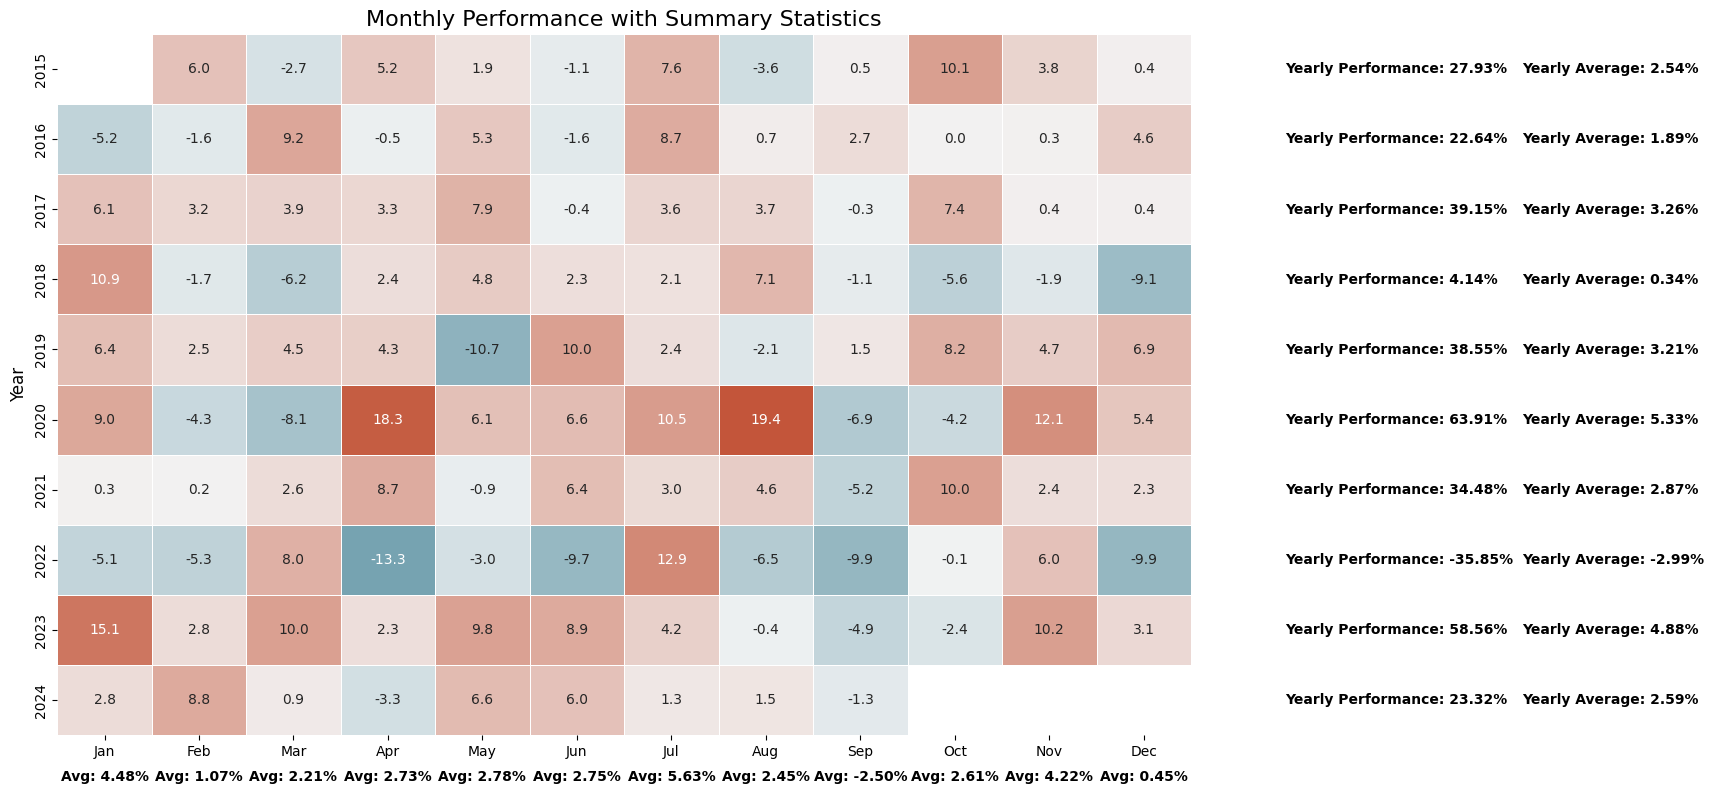

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers for 10 prominent stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-B', 'JNJ', 'V']

# Download data from Yahoo Finance
data = yf.download(tickers, start="2015-01-01", end="2024-12-31", interval="1mo")['Adj Close']

# Calculate monthly returns
returns = data.pct_change().dropna() * 100

# Add 'Year' and 'Month' columns to the returns DataFrame
returns['Year'] = returns.index.year
returns['Month'] = returns.index.month

# Calculate the average monthly returns for each year and month
avg_returns = returns.groupby(['Year', 'Month']).mean().mean(axis=1).unstack()

# Calculate yearly performance and yearly average
yearly_performance = avg_returns.sum(axis=1).round(2)
yearly_average = avg_returns.mean(axis=1).round(2)

# Calculate the overall monthly average across all years
monthly_average = avg_returns.mean(axis=0).round(2)

# Prepare the data for the heatmap
heatmap_data = avg_returns.copy()

# Create a new figure for the heatmap
plt.figure(figsize=(18, 8))  # Increased width to ensure space for text

# Define a custom colormap for highlighting
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=cmap, cbar=False, center=0, linewidths=0.5)

# Add title and labels (excluding "Month" at the bottom)
plt.title("Monthly Performance with Summary Statistics", fontsize=16)
plt.ylabel("Year", fontsize=12)
plt.xlabel("")  # Explicitly set xlabel to empty string to remove "Month" label

# Set custom x-axis labels for the months
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12) + 0.5, labels=month_labels)

# Adjust the vertical position of the summary statistics text to avoid overlapping
# Correctly iterate over the years to place the summary statistics
for i, year in enumerate(avg_returns.index):
    if year in yearly_performance.index:  # Ensure the year exists in yearly_performance
        # Safely access the yearly performance and average with loc[], space added for better alignment
        plt.text(13.0, i + 0.5, f"Yearly Performance: {yearly_performance.loc[year]:.2f}%",
                 color='black', ha='left', va='center', fontsize=10, weight='bold')
        plt.text(15.5, i + 0.5, f"Yearly Average: {yearly_average.loc[year]:.2f}%",
                 color='black', ha='left', va='center', fontsize=10, weight='bold')

# Display the average values for each month at the bottom of the diagram, with improved spacing
for i, month in enumerate(month_labels):
    plt.text(i + 0.5, len(avg_returns.index) + 0.5, f"Avg: {monthly_average.loc[i+1]:.2f}%",  # Increased vertical space
             color='black', ha='center', va='top', fontsize=10, weight='bold')

# Show the final plot with adjusted spacing
plt.tight_layout()
plt.show()


The diagram produced by this code is a heatmap that visually represents the monthly performance of 10 prominent stocks from 2015 to 2024. The data reflects the average percentage returns for each month over the given period. Here's a detailed commentary on the key elements of the heatmap:

Heatmap Structure:

The heatmap uses a color gradient to highlight the performance of the stocks, with a diverging colormap emphasizing both positive and negative returns.
Warmer colors (reds) represent months with lower or negative average returns, while cooler colors (blues) show months with higher average returns. The middle ground (lighter shades) indicates neutral performance.
Summary Statistics:

On the right side of the heatmap, each year is annotated with two summary statistics:
Yearly Performance: The sum of the average monthly returns for that year, indicating the total annual performance.
Yearly Average: The average return per month for each year, providing insight into the average volatility or performance across the months.
These statistics are helpful in quickly understanding whether a year was overall positive or negative for the portfolio.
Monthly Averages:

At the bottom of the heatmap, the average return for each month across all years is displayed. These values help identify patterns in seasonality or months with consistently higher or lower returns.
Annotations:

The performance data for each month is annotated directly on the heatmap, allowing for an easy comparison of monthly returns across different years.
The combination of direct annotations and color gradients makes the diagram informative and easy to interpret.
Custom Labeling and Layout:

The x-axis labels have been customized to display month abbreviations (Jan, Feb, etc.), improving readability.
Spacing adjustments ensure that the summary statistics and monthly averages do not overlap with the heatmap, keeping the plot clean and visually organized.
Insightful Observations:

By observing the heatmap, one can identify trends such as:
Seasonality effects: Certain months may show consistent positive or negative returns over multiple years, which could be related to market cycles or economic events.
Volatility: Years with greater color variation indicate higher volatility, while more uniform years suggest steadier performance.
Overall Market Trends: The yearly performance annotations help assess whether certain years were predominantly strong or weak for the selected stocks.
The diagram serves as a robust visualization tool, combining both historical performance trends and summary statistics to provide a holistic view of the stocks’ performance over time.







